<a href="https://colab.research.google.com/github/nataliaJanasiewicz/MIW/blob/main/projekt4/gr12c_s22847_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Wczytanie danych

<function matplotlib.pyplot.show(close=None, block=None)>

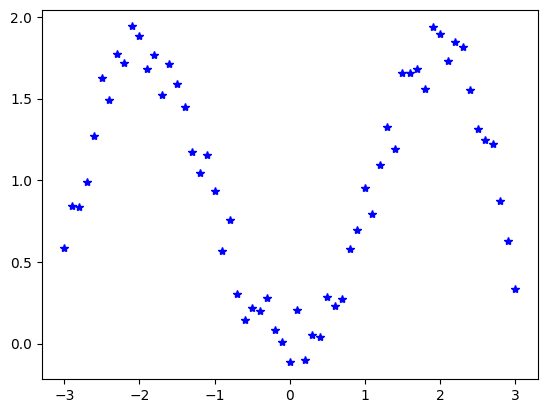

In [ ]:
file = np.loadtxt("/content/dane3.txt")
X = file[:,[0]]
y = file[:,[1]]

#print(X)
#print(y)

E_TEST = []
E_TRAIN = []

plt.plot(X, y, 'b*')
plt.show

#Podział danych na train i test

<function matplotlib.pyplot.show(close=None, block=None)>

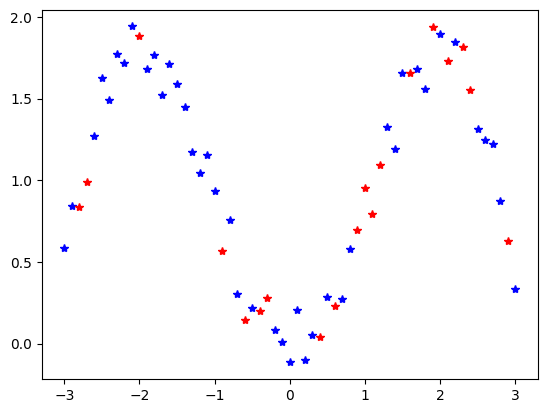

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.show

#MODEL1 - liniowy model parametryczny => y = ax + b

0.3969362245131241
0.43403145971902457


<function matplotlib.pyplot.show(close=None, block=None)>

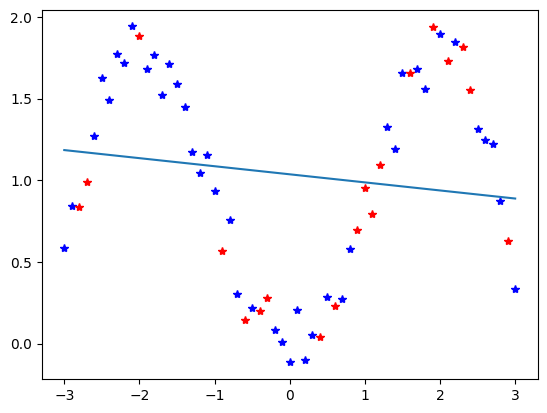

In [ ]:
F1 = np.hstack([X_train, np.ones(X_train.shape)]) #macierz parametrów
#F1 - macierz projektująca, która przekształca wektor danych wejściowych X_train na macierz zmiennych objaśniających F1
#y_train to wektor wartości wyjściowych odpowiadający wektorowi X_train.
#@ - mnożenie macierzy.
#.T - transpozycja macierzy.
V1 = np.linalg.inv(F1.T @ F1) @ F1.T @ y_train #macierz psełdo odwrotna mnozona przez y
#F1.T @ F1 - macierz kwadratowa, zawieracjaca iloczyn skalarny F1
#np.linalg.inv(F1.T @ F1) - odwrotnosc macierzy 
#F1.T @ y_train - wektor kolumnowy
#V1 - wektor parametrow dla regresji iliowej

#TRAIN
#liczenie bledu 
E1_train = y_train - (V1[0]*X_train + V1[1])
#sredni blad kwadratowy
#MSE1_train = (E1_train.T @ E1_train)/len(E1_train)
MSE1_train = np.mean(E1_train**2)
print(MSE1_train)

#TEST
#liczenie bledu 
E1_test = y_test - (V1[0]*X_test + V1[1])
#sredni blad kwadratowy
#MSE1_test = (E1_test.T @ E1_test)/len(E1_test)
MSE1_test = np.mean(E1_test**2)
print(MSE1_test)

E_TRAIN.append(MSE1_train)
E_TEST.append(MSE1_test)

plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1])
plt.show

#MoDEL 2 - kwadratowy => y = ax^2 + bx + c

0.3280577215023893
0.34199137102018085


<function matplotlib.pyplot.show(close=None, block=None)>

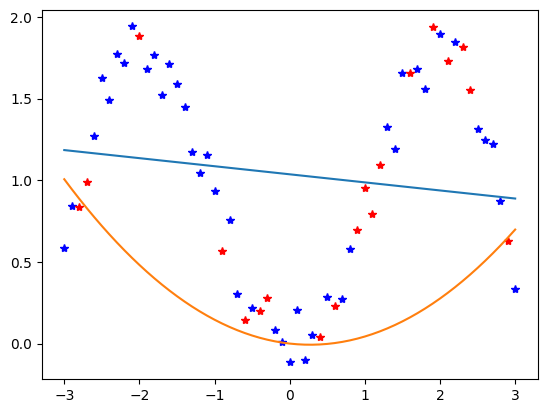

In [ ]:
F2 = np.hstack([X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V2 = np.linalg.pinv(F2) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E2_train = y_train - (V2[0]*np.square(X_train) + V2[1]*X_train + V2[2])
# sredni blad kwadratowy
MSE2_train = np.mean(E2_train**2)
print(MSE2_train)

# TEST
# liczenie bledu 
E2_test = y_test - (V2[0]*np.square(X_test) + V2[1]*X_test + V2[2])
# sredni blad kwadratowy
MSE2_test = np.mean(E2_test**2)
print(MSE2_test)

E_TRAIN.append(MSE2_train)
E_TEST.append(MSE2_test)

plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
plt.show

#MODEL 3 => y = a/x + b

0.37163766138088117
0.40873595008195324


<function matplotlib.pyplot.show(close=None, block=None)>

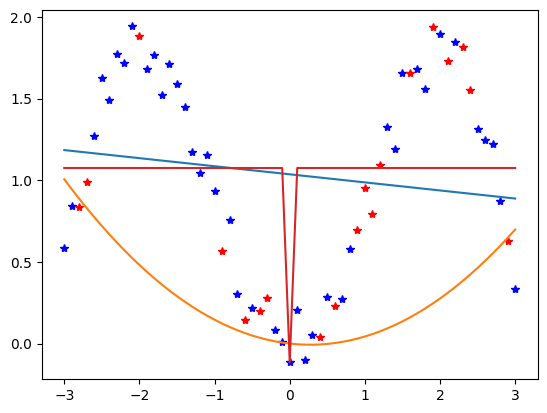

In [ ]:
F3 = np.hstack([1/X_train, np.ones(X_train.shape)]) #macierz parametrów
V3 = np.linalg.pinv(F3) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E3_train = y_train - (V3[0]/X_train + V3[1])
# sredni blad kwadratowy
MSE3_train = np.mean(E3_train**2)
print(MSE3_train)

# TEST
# liczenie bledu 
E3_test = y_test - (V3[0]/X_test + V3[1])
# sredni blad kwadratowy
MSE3_test = np.mean(E3_test**2)
print(MSE3_test)

E_TRAIN.append(MSE3_train)
E_TEST.append(MSE3_test)

plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.show

#MODEL 4 - eksponencjalna => y = ab^x

3.848511685292504e+21
2.436342477033588e+20


<ipython-input-118-43b7b5a560c2>:3: RuntimeWarning: invalid value encountered in log
  log_y = np.log(y)


<function matplotlib.pyplot.show(close=None, block=None)>

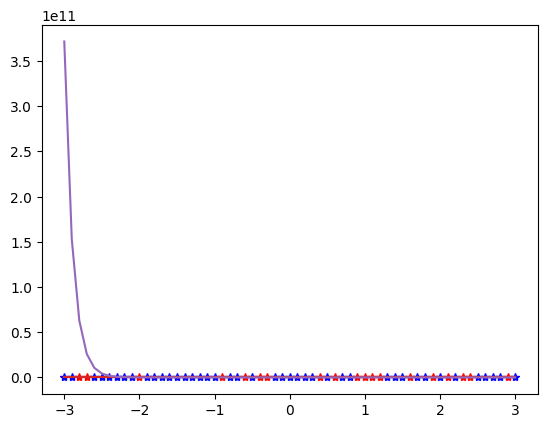

In [ ]:
# transformacja modelu do postaci liniowej
F4 = np.vstack([X, np.ones(X.shape)]).T
log_y = np.log(y)

# obliczenie pseudoinwersji
V4 = np.linalg.pinv(F4) 

# TRAIN
# liczenie bledu 
E4_train = y_train - (np.power(V4[0]*V4[1],X_train))
# sredni blad kwadratowy
MSE4_train = np.mean(E4_train**2)
print(MSE4_train)

# TEST
# liczenie bledu 
E4_test = y_test - (np.power(V4[0]*V4[1],X_test))
# sredni blad kwadratowy
MSE4_test = np.mean(E4_test**2)
print(MSE4_test)

#E_TRAIN.append(MSE4_train)
#E_TEST.append(MSE4_test)

plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, np.power(V4[0]*V4[1],X)) #model 4
plt.show

#MODEL 5 - wielomian - dla dane 5

0.021634436716107784
0.025771698545048773


<function matplotlib.pyplot.show(close=None, block=None)>

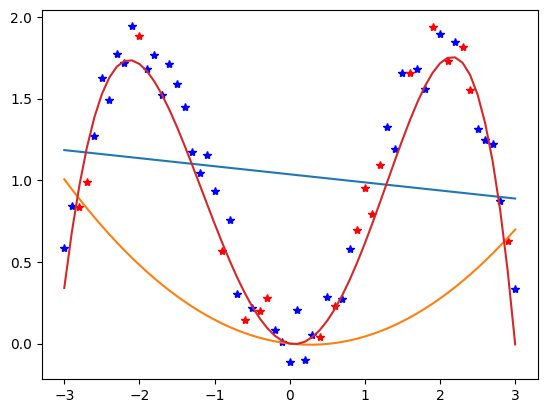

In [ ]:
F5 = np.hstack([X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V5 = np.linalg.pinv(F5) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E5_train = y_train - (V5[0]*np.power(X_train, 5) + V5[1]*np.power(X_train, 4) + V5[2]*np.power(X_train, 3) +V5[3]*np.power(X_train, 2) + V5[4]*X_train + V5[5])
# sredni blad kwadratowy
MSE5_train = np.mean(E5_train**2)
print(MSE5_train)

# TEST
# liczenie bledu 
E5_test = y_test - (V5[0]*np.power(X_test, 5) + V5[1]*np.power(X_test, 4) + V5[2]*np.power(X_test, 3) +V5[3]*np.power(X_test, 2) + V5[4]*X_test + V5[5])
# sredni blad kwadratowy
MSE5_test = np.mean(E5_test**2)
print(MSE5_test)

E_TRAIN.append(MSE5_train)
E_TEST.append(MSE5_test)

plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
#plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.show

#MODEL 6 - wielomianowy dla dane7

0.011557210266659826
0.016017391140353582


<function matplotlib.pyplot.show(close=None, block=None)>

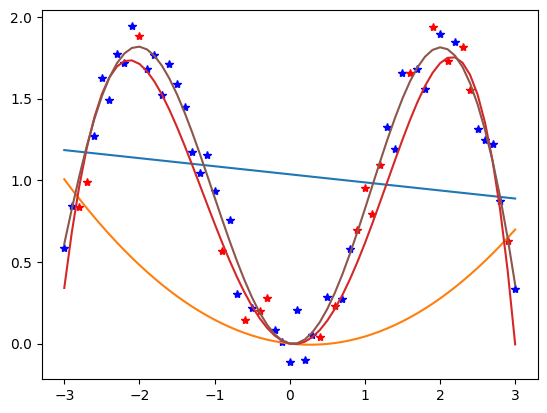

In [ ]:
F6 = np.hstack([X_train**9,X_train**8,X_train**7,X_train**6,X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V6 = np.linalg.pinv(F6) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E6_train = y_train - (V6[0]*np.power(X_train, 9) +V6[1]*np.power(X_train, 8) +V6[2]*np.power(X_train, 7) +V6[3]*np.power(X_train, 6) +V6[4]*np.power(X_train, 5) + V6[5]*np.power(X_train, 4) + V6[6]*np.power(X_train, 3) +V6[7]*np.power(X_train, 2) + V6[8]*X_train + V6[9])
# sredni blad kwadratowy
MSE6_train = np.mean(E6_train**2)
print(MSE6_train)

# TEST
# liczenie bledu 
E6_test = y_test - (V6[0]*np.power(X_test, 9) +V6[1]*np.power(X_test, 8) +V6[2]*np.power(X_test, 7) +V6[3]*np.power(X_test, 6) +V6[4]*np.power(X_test, 5) + V6[5]*np.power(X_test, 4) + V6[6]*np.power(X_test, 3) +V6[7]*np.power(X_test, 2) + V6[8]*X_test + V6[9])
# sredni blad kwadratowy
MSE6_test = np.mean(E6_test**2)
print(MSE6_test)

E_TRAIN.append(MSE6_train)
E_TEST.append(MSE6_test)


plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
#plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.plot(X, V6[0]*X**9 +V6[1]*X**8 +V6[2]*X**7 +V6[3]*X**6 +V6[4]*X**5 + V6[5]*X**4 + V6[6]*X**3 +V6[7]*X*X + V6[8]*X, V6[9]) #model 6
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

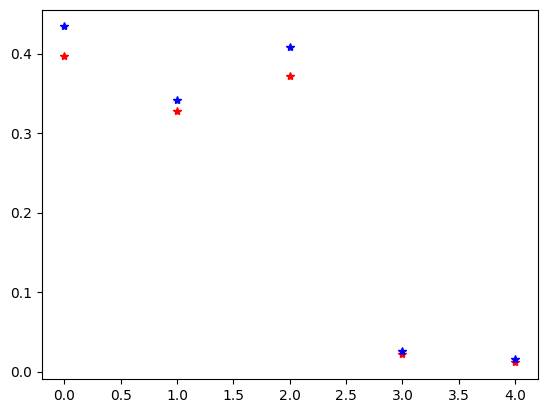

In [ ]:
plt.plot(E_TRAIN,'r*')
plt.plot(E_TEST, 'b*')
plt.show

##ALL

23.91861368610644
24.4094785828875
22.407497407366236
21.011594386493844
23.89400997446362
23.658579971644592
3.0473735256148826
3.7425344030568963
0.31629502678183014
0.5946474495734927


<function matplotlib.pyplot.show(close=None, block=None)>

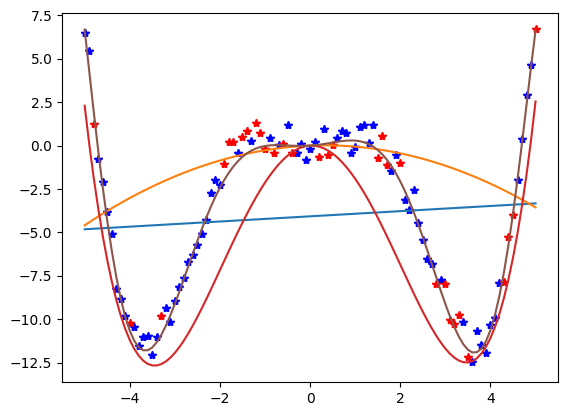

In [ ]:
file = np.loadtxt("/content/dane5.txt")
X = file[:,[0]]
y = file[:,[1]]

#print(X)
#print(y)

E_TEST = []
E_TRAIN = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.show

F1 = np.hstack([X_train, np.ones(X_train.shape)]) #macierz parametrów
V1 = np.linalg.inv(F1.T @ F1) @ F1.T @ y_train #macierz psełdo odwrotna mnozona przez y

#TRAIN
#liczenie bledu 
E1_train = y_train - (V1[0]*X_train + V1[1])
#sredni blad kwadratowy
#MSE1_train = (E1_train.T @ E1_train)/len(E1_train)
MSE1_train = np.mean(E1_train**2)
print(MSE1_train)

#TEST
#liczenie bledu 
E1_test = y_test - (V1[0]*X_test + V1[1])
#sredni blad kwadratowy
#MSE1_test = (E1_test.T @ E1_test)/len(E1_test)
MSE1_test = np.mean(E1_test**2)
print(MSE1_test)

E_TRAIN.append(MSE1_train)
E_TEST.append(MSE1_test)

F2 = np.hstack([X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V2 = np.linalg.pinv(F2) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E2_train = y_train - (V2[0]*np.square(X_train) + V2[1]*X_train + V2[2])
# sredni blad kwadratowy
MSE2_train = np.mean(E2_train**2)
print(MSE2_train)

# TEST
# liczenie bledu 
E2_test = y_test - (V2[0]*np.square(X_test) + V2[1]*X_test + V2[2])
# sredni blad kwadratowy
MSE2_test = np.mean(E2_test**2)
print(MSE2_test)

E_TRAIN.append(MSE2_train)
E_TEST.append(MSE2_test)

F3 = np.hstack([1/X_train, np.ones(X_train.shape)]) #macierz parametrów
V3 = np.linalg.pinv(F3) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E3_train = y_train - (V3[0]/X_train + V3[1])
# sredni blad kwadratowy
MSE3_train = np.mean(E3_train**2)
print(MSE3_train)

# TEST
# liczenie bledu 
E3_test = y_test - (V3[0]/X_test + V3[1])
# sredni blad kwadratowy
MSE3_test = np.mean(E3_test**2)
print(MSE3_test)

E_TRAIN.append(MSE3_train)
E_TEST.append(MSE3_test)

F5 = np.hstack([X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V5 = np.linalg.pinv(F5) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E5_train = y_train - (V5[0]*np.power(X_train, 5) + V5[1]*np.power(X_train, 4) + V5[2]*np.power(X_train, 3) +V5[3]*np.power(X_train, 2) + V5[4]*X_train + V5[5])
# sredni blad kwadratowy
MSE5_train = np.mean(E5_train**2)
print(MSE5_train)

# TEST
# liczenie bledu 
E5_test = y_test - (V5[0]*np.power(X_test, 5) + V5[1]*np.power(X_test, 4) + V5[2]*np.power(X_test, 3) +V5[3]*np.power(X_test, 2) + V5[4]*X_test + V5[5])
# sredni blad kwadratowy
MSE5_test = np.mean(E5_test**2)
print(MSE5_test)

E_TRAIN.append(MSE5_train)
E_TEST.append(MSE5_test)

F6 = np.hstack([X_train**9,X_train**8,X_train**7,X_train**6,X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V6 = np.linalg.pinv(F6) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E6_train = y_train - (V6[0]*np.power(X_train, 9) +V6[1]*np.power(X_train, 8) +V6[2]*np.power(X_train, 7) +V6[3]*np.power(X_train, 6) +V6[4]*np.power(X_train, 5) + V6[5]*np.power(X_train, 4) + V6[6]*np.power(X_train, 3) +V6[7]*np.power(X_train, 2) + V6[8]*X_train + V6[9])
# sredni blad kwadratowy
MSE6_train = np.mean(E6_train**2)
print(MSE6_train)

# TEST
# liczenie bledu 
E6_test = y_test - (V6[0]*np.power(X_test, 9) +V6[1]*np.power(X_test, 8) +V6[2]*np.power(X_test, 7) +V6[3]*np.power(X_test, 6) +V6[4]*np.power(X_test, 5) + V6[5]*np.power(X_test, 4) + V6[6]*np.power(X_test, 3) +V6[7]*np.power(X_test, 2) + V6[8]*X_test + V6[9])
# sredni blad kwadratowy
MSE6_test = np.mean(E6_test**2)
print(MSE6_test)

E_TRAIN.append(MSE6_train)
E_TEST.append(MSE6_test)


plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
#plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.plot(X, V6[0]*X**9 +V6[1]*X**8 +V6[2]*X**7 +V6[3]*X**6 +V6[4]*X**5 + V6[5]*X**4 + V6[6]*X**3 +V6[7]*X*X + V6[8]*X, V6[9]) #model 6
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

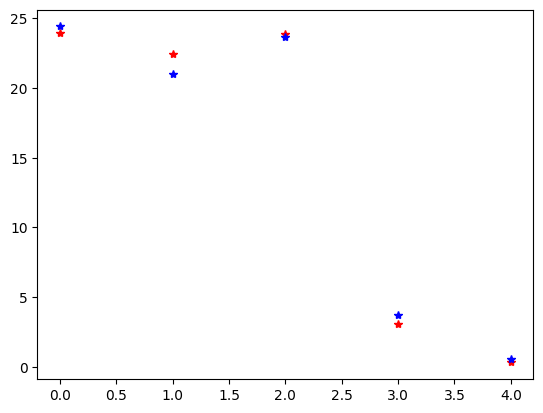

In [ ]:
plt.plot(E_TRAIN,'r*')
plt.plot(E_TEST, 'b*')
plt.show

0.19942917726712675
0.29658606017146166
0.19920495775234573
0.29957171002627603
0.187279536528951
3.3575155326086338e+25
0.13704393013691246
0.22130236297704528
0.06423407432631699
0.155422305391241


<function matplotlib.pyplot.show(close=None, block=None)>

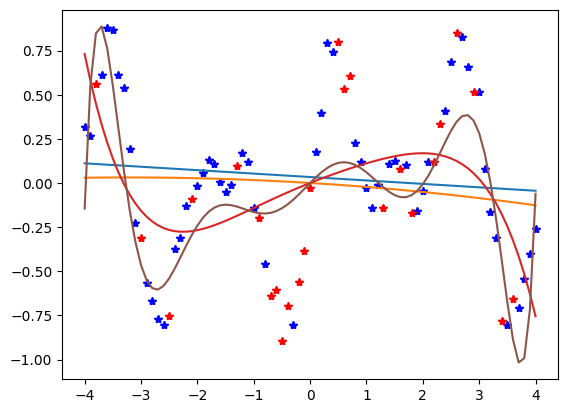

In [ ]:
file = np.loadtxt("/content/dane7.txt")
X = file[:,[0]]
y = file[:,[1]]

#print(X)
#print(y)

E_TEST = []
E_TRAIN = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.show

F1 = np.hstack([X_train, np.ones(X_train.shape)]) #macierz parametrów
V1 = np.linalg.inv(F1.T @ F1) @ F1.T @ y_train #macierz psełdo odwrotna mnozona przez y

#TRAIN
#liczenie bledu 
E1_train = y_train - (V1[0]*X_train + V1[1])
#sredni blad kwadratowy
#MSE1_train = (E1_train.T @ E1_train)/len(E1_train)
MSE1_train = np.mean(E1_train**2)
print(MSE1_train)

#TEST
#liczenie bledu 
E1_test = y_test - (V1[0]*X_test + V1[1])
#sredni blad kwadratowy
#MSE1_test = (E1_test.T @ E1_test)/len(E1_test)
MSE1_test = np.mean(E1_test**2)
print(MSE1_test)

E_TRAIN.append(MSE1_train)
E_TEST.append(MSE1_test)

F2 = np.hstack([X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V2 = np.linalg.pinv(F2) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E2_train = y_train - (V2[0]*np.square(X_train) + V2[1]*X_train + V2[2])
# sredni blad kwadratowy
MSE2_train = np.mean(E2_train**2)
print(MSE2_train)

# TEST
# liczenie bledu 
E2_test = y_test - (V2[0]*np.square(X_test) + V2[1]*X_test + V2[2])
# sredni blad kwadratowy
MSE2_test = np.mean(E2_test**2)
print(MSE2_test)

E_TRAIN.append(MSE2_train)
E_TEST.append(MSE2_test)

F3 = np.hstack([1/X_train, np.ones(X_train.shape)]) #macierz parametrów
V3 = np.linalg.pinv(F3) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E3_train = y_train - (V3[0]/X_train + V3[1])
# sredni blad kwadratowy
MSE3_train = np.mean(E3_train**2)
print(MSE3_train)

# TEST
# liczenie bledu 
E3_test = y_test - (V3[0]/X_test + V3[1])
# sredni blad kwadratowy
MSE3_test = np.mean(E3_test**2)
print(MSE3_test)

#E_TRAIN.append(MSE3_train)
#E_TEST.append(MSE3_test)

F5 = np.hstack([X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V5 = np.linalg.pinv(F5) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E5_train = y_train - (V5[0]*np.power(X_train, 5) + V5[1]*np.power(X_train, 4) + V5[2]*np.power(X_train, 3) +V5[3]*np.power(X_train, 2) + V5[4]*X_train + V5[5])
# sredni blad kwadratowy
MSE5_train = np.mean(E5_train**2)
print(MSE5_train)

# TEST
# liczenie bledu 
E5_test = y_test - (V5[0]*np.power(X_test, 5) + V5[1]*np.power(X_test, 4) + V5[2]*np.power(X_test, 3) +V5[3]*np.power(X_test, 2) + V5[4]*X_test + V5[5])
# sredni blad kwadratowy
MSE5_test = np.mean(E5_test**2)
print(MSE5_test)

E_TRAIN.append(MSE5_train)
E_TEST.append(MSE5_test)

F6 = np.hstack([X_train**9,X_train**8,X_train**7,X_train**6,X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V6 = np.linalg.pinv(F6) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E6_train = y_train - (V6[0]*np.power(X_train, 9) +V6[1]*np.power(X_train, 8) +V6[2]*np.power(X_train, 7) +V6[3]*np.power(X_train, 6) +V6[4]*np.power(X_train, 5) + V6[5]*np.power(X_train, 4) + V6[6]*np.power(X_train, 3) +V6[7]*np.power(X_train, 2) + V6[8]*X_train + V6[9])
# sredni blad kwadratowy
MSE6_train = np.mean(E6_train**2)
print(MSE6_train)

# TEST
# liczenie bledu 
E6_test = y_test - (V6[0]*np.power(X_test, 9) +V6[1]*np.power(X_test, 8) +V6[2]*np.power(X_test, 7) +V6[3]*np.power(X_test, 6) +V6[4]*np.power(X_test, 5) + V6[5]*np.power(X_test, 4) + V6[6]*np.power(X_test, 3) +V6[7]*np.power(X_test, 2) + V6[8]*X_test + V6[9])
# sredni blad kwadratowy
MSE6_test = np.mean(E6_test**2)
print(MSE6_test)

E_TRAIN.append(MSE6_train)
E_TEST.append(MSE6_test)


plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
#plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.plot(X, V6[0]*X**9 +V6[1]*X**8 +V6[2]*X**7 +V6[3]*X**6 +V6[4]*X**5 + V6[5]*X**4 + V6[6]*X**3 +V6[7]*X*X + V6[8]*X, V6[9]) #model 6
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

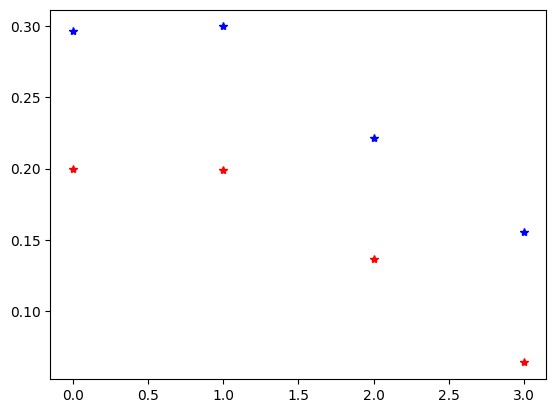

In [ ]:
plt.plot(E_TRAIN,'b*')
plt.plot(E_TEST, 'r*')
plt.show

20.95973779797362
20.37246079412429
20.948222981800207
20.473874832601616
113.09655296760998
108.94306373129928
0.7945779807515779
0.7776231820047306
0.7394573245490978
0.7390076657511991


<function matplotlib.pyplot.show(close=None, block=None)>

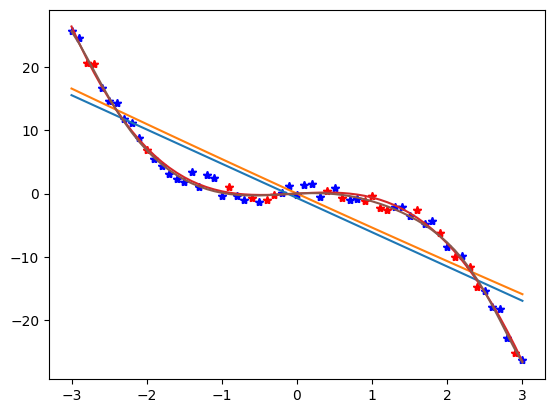

In [ ]:
file = np.loadtxt("/content/dane14.txt")
X = file[:,[0]]
y = file[:,[1]]

#print(X)
#print(y)

E_TEST = []
E_TRAIN = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.show

F1 = np.hstack([X_train, np.ones(X_train.shape)]) #macierz parametrów
V1 = np.linalg.inv(F1.T @ F1) @ F1.T @ y_train #macierz psełdo odwrotna mnozona przez y

#TRAIN
#liczenie bledu 
E1_train = y_train - (V1[0]*X_train + V1[1])
#sredni blad kwadratowy
#MSE1_train = (E1_train.T @ E1_train)/len(E1_train)
MSE1_train = np.mean(E1_train**2)
print(MSE1_train)

#TEST
#liczenie bledu 
E1_test = y_test - (V1[0]*X_test + V1[1])
#sredni blad kwadratowy
#MSE1_test = (E1_test.T @ E1_test)/len(E1_test)
MSE1_test = np.mean(E1_test**2)
print(MSE1_test)

E_TRAIN.append(MSE1_train)
E_TEST.append(MSE1_test)

F2 = np.hstack([X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V2 = np.linalg.pinv(F2) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E2_train = y_train - (V2[0]*np.square(X_train) + V2[1]*X_train + V2[2])
# sredni blad kwadratowy
MSE2_train = np.mean(E2_train**2)
print(MSE2_train)

# TEST
# liczenie bledu 
E2_test = y_test - (V2[0]*np.square(X_test) + V2[1]*X_test + V2[2])
# sredni blad kwadratowy
MSE2_test = np.mean(E2_test**2)
print(MSE2_test)

E_TRAIN.append(MSE2_train)
E_TEST.append(MSE2_test)

F3 = np.hstack([1/X_train, np.ones(X_train.shape)]) #macierz parametrów
V3 = np.linalg.pinv(F3) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E3_train = y_train - (V3[0]/X_train + V3[1])
# sredni blad kwadratowy
MSE3_train = np.mean(E3_train**2)
print(MSE3_train)

# TEST
# liczenie bledu 
E3_test = y_test - (V3[0]/X_test + V3[1])
# sredni blad kwadratowy
MSE3_test = np.mean(E3_test**2)
print(MSE3_test)

#E_TRAIN.append(MSE3_train)
#E_TEST.append(MSE3_test)

F5 = np.hstack([X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V5 = np.linalg.pinv(F5) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E5_train = y_train - (V5[0]*np.power(X_train, 5) + V5[1]*np.power(X_train, 4) + V5[2]*np.power(X_train, 3) +V5[3]*np.power(X_train, 2) + V5[4]*X_train + V5[5])
# sredni blad kwadratowy
MSE5_train = np.mean(E5_train**2)
print(MSE5_train)

# TEST
# liczenie bledu 
E5_test = y_test - (V5[0]*np.power(X_test, 5) + V5[1]*np.power(X_test, 4) + V5[2]*np.power(X_test, 3) +V5[3]*np.power(X_test, 2) + V5[4]*X_test + V5[5])
# sredni blad kwadratowy
MSE5_test = np.mean(E5_test**2)
print(MSE5_test)

E_TRAIN.append(MSE5_train)
E_TEST.append(MSE5_test)

F6 = np.hstack([X_train**9,X_train**8,X_train**7,X_train**6,X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V6 = np.linalg.pinv(F6) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E6_train = y_train - (V6[0]*np.power(X_train, 9) +V6[1]*np.power(X_train, 8) +V6[2]*np.power(X_train, 7) +V6[3]*np.power(X_train, 6) +V6[4]*np.power(X_train, 5) + V6[5]*np.power(X_train, 4) + V6[6]*np.power(X_train, 3) +V6[7]*np.power(X_train, 2) + V6[8]*X_train + V6[9])
# sredni blad kwadratowy
MSE6_train = np.mean(E6_train**2)
print(MSE6_train)

# TEST
# liczenie bledu 
E6_test = y_test - (V6[0]*np.power(X_test, 9) +V6[1]*np.power(X_test, 8) +V6[2]*np.power(X_test, 7) +V6[3]*np.power(X_test, 6) +V6[4]*np.power(X_test, 5) + V6[5]*np.power(X_test, 4) + V6[6]*np.power(X_test, 3) +V6[7]*np.power(X_test, 2) + V6[8]*X_test + V6[9])
# sredni blad kwadratowy
MSE6_test = np.mean(E6_test**2)
print(MSE6_test)

E_TRAIN.append(MSE6_train)
E_TEST.append(MSE6_test)


plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
#plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.plot(X, V6[0]*X**9 +V6[1]*X**8 +V6[2]*X**7 +V6[3]*X**6 +V6[4]*X**5 + V6[5]*X**4 + V6[6]*X**3 +V6[7]*X*X + V6[8]*X, V6[9]) #model 6
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

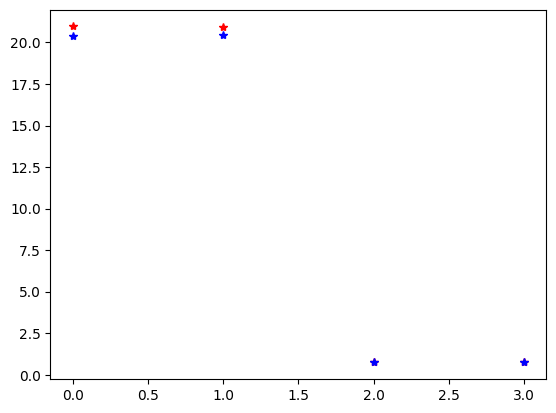

In [ ]:
plt.plot(E_TRAIN,'r*')
plt.plot(E_TEST, 'b*')
plt.show

0.22594380569604583
0.3066490859312066
0.20136143057998748
0.32603718439912904
0.22703116299671627
7.818790933606562e+27
0.16993774351276297
0.46976350781224124
0.1084922876354888
86.55439560809815


<function matplotlib.pyplot.show(close=None, block=None)>

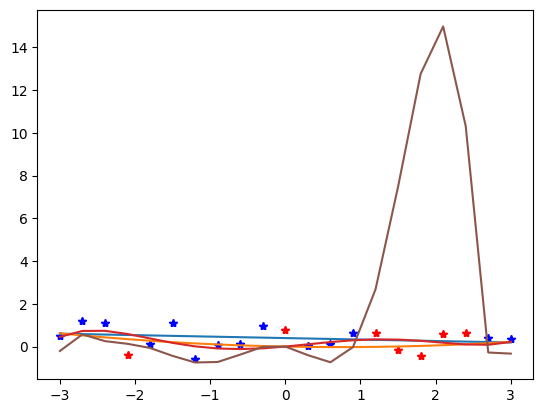

In [ ]:
file = np.loadtxt("/content/dane15.txt")
X = file[:,[0]]
y = file[:,[1]]

#print(X)
#print(y)

E_TEST = []
E_TRAIN = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.show

F1 = np.hstack([X_train, np.ones(X_train.shape)]) #macierz parametrów
V1 = np.linalg.inv(F1.T @ F1) @ F1.T @ y_train #macierz psełdo odwrotna mnozona przez y

#TRAIN
#liczenie bledu 
E1_train = y_train - (V1[0]*X_train + V1[1])
#sredni blad kwadratowy
#MSE1_train = (E1_train.T @ E1_train)/len(E1_train)
MSE1_train = np.mean(E1_train**2)
print(MSE1_train)

#TEST
#liczenie bledu 
E1_test = y_test - (V1[0]*X_test + V1[1])
#sredni blad kwadratowy
#MSE1_test = (E1_test.T @ E1_test)/len(E1_test)
MSE1_test = np.mean(E1_test**2)
print(MSE1_test)

E_TRAIN.append(MSE1_train)
E_TEST.append(MSE1_test)

F2 = np.hstack([X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V2 = np.linalg.pinv(F2) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E2_train = y_train - (V2[0]*np.square(X_train) + V2[1]*X_train + V2[2])
# sredni blad kwadratowy
MSE2_train = np.mean(E2_train**2)
print(MSE2_train)

# TEST
# liczenie bledu 
E2_test = y_test - (V2[0]*np.square(X_test) + V2[1]*X_test + V2[2])
# sredni blad kwadratowy
MSE2_test = np.mean(E2_test**2)
print(MSE2_test)

E_TRAIN.append(MSE2_train)
E_TEST.append(MSE2_test)

F3 = np.hstack([1/X_train, np.ones(X_train.shape)]) #macierz parametrów
V3 = np.linalg.pinv(F3) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E3_train = y_train - (V3[0]/X_train + V3[1])
# sredni blad kwadratowy
MSE3_train = np.mean(E3_train**2)
print(MSE3_train)

# TEST
# liczenie bledu 
E3_test = y_test - (V3[0]/X_test + V3[1])
# sredni blad kwadratowy
MSE3_test = np.mean(E3_test**2)
print(MSE3_test)

#E_TRAIN.append(MSE3_train)
#E_TEST.append(MSE3_test)

F5 = np.hstack([X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V5 = np.linalg.pinv(F5) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E5_train = y_train - (V5[0]*np.power(X_train, 5) + V5[1]*np.power(X_train, 4) + V5[2]*np.power(X_train, 3) +V5[3]*np.power(X_train, 2) + V5[4]*X_train + V5[5])
# sredni blad kwadratowy
MSE5_train = np.mean(E5_train**2)
print(MSE5_train)

# TEST
# liczenie bledu 
E5_test = y_test - (V5[0]*np.power(X_test, 5) + V5[1]*np.power(X_test, 4) + V5[2]*np.power(X_test, 3) +V5[3]*np.power(X_test, 2) + V5[4]*X_test + V5[5])
# sredni blad kwadratowy
MSE5_test = np.mean(E5_test**2)
print(MSE5_test)

E_TRAIN.append(MSE5_train)
E_TEST.append(MSE5_test)

F6 = np.hstack([X_train**9,X_train**8,X_train**7,X_train**6,X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V6 = np.linalg.pinv(F6) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E6_train = y_train - (V6[0]*np.power(X_train, 9) +V6[1]*np.power(X_train, 8) +V6[2]*np.power(X_train, 7) +V6[3]*np.power(X_train, 6) +V6[4]*np.power(X_train, 5) + V6[5]*np.power(X_train, 4) + V6[6]*np.power(X_train, 3) +V6[7]*np.power(X_train, 2) + V6[8]*X_train + V6[9])
# sredni blad kwadratowy
MSE6_train = np.mean(E6_train**2)
print(MSE6_train)

# TEST
# liczenie bledu 
E6_test = y_test - (V6[0]*np.power(X_test, 9) +V6[1]*np.power(X_test, 8) +V6[2]*np.power(X_test, 7) +V6[3]*np.power(X_test, 6) +V6[4]*np.power(X_test, 5) + V6[5]*np.power(X_test, 4) + V6[6]*np.power(X_test, 3) +V6[7]*np.power(X_test, 2) + V6[8]*X_test + V6[9])
# sredni blad kwadratowy
MSE6_test = np.mean(E6_test**2)
print(MSE6_test)

E_TRAIN.append(MSE6_train)
E_TEST.append(MSE6_test)


plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
#plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.plot(X, V6[0]*X**9 +V6[1]*X**8 +V6[2]*X**7 +V6[3]*X**6 +V6[4]*X**5 + V6[5]*X**4 + V6[6]*X**3 +V6[7]*X*X + V6[8]*X, V6[9]) #model 6
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

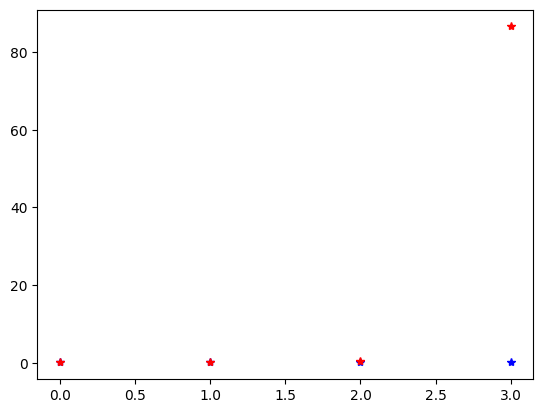

In [ ]:
plt.plot(E_TRAIN,'b*')
plt.plot(E_TEST, 'r*')
plt.show

1.4928021676243137
1.770787217836735
0.008558569410697827
0.017137450475244394
1.426306265942578
1.7061680604618237
0.007871077497541101
0.017444111192320463
0.0066924748916993146
0.025588815410259647


<function matplotlib.pyplot.show(close=None, block=None)>

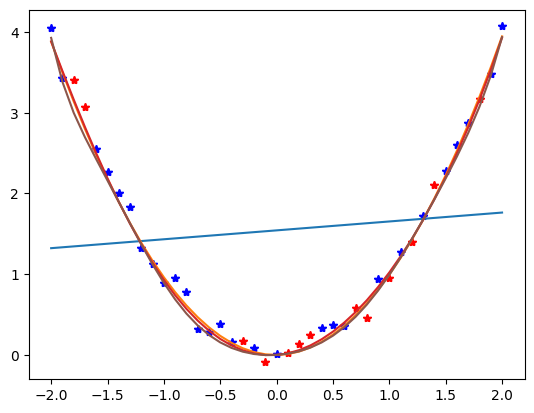

In [ ]:
file = np.loadtxt("/content/dane1.txt")
X = file[:,[0]]
y = file[:,[1]]

#print(X)
#print(y)

E_TEST = []
E_TRAIN = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.show

F1 = np.hstack([X_train, np.ones(X_train.shape)]) #macierz parametrów
V1 = np.linalg.inv(F1.T @ F1) @ F1.T @ y_train #macierz psełdo odwrotna mnozona przez y

#TRAIN
#liczenie bledu 
E1_train = y_train - (V1[0]*X_train + V1[1])
#sredni blad kwadratowy
#MSE1_train = (E1_train.T @ E1_train)/len(E1_train)
MSE1_train = np.mean(E1_train**2)
print(MSE1_train)

#TEST
#liczenie bledu 
E1_test = y_test - (V1[0]*X_test + V1[1])
#sredni blad kwadratowy
#MSE1_test = (E1_test.T @ E1_test)/len(E1_test)
MSE1_test = np.mean(E1_test**2)
print(MSE1_test)

E_TRAIN.append(MSE1_train)
E_TEST.append(MSE1_test)

F2 = np.hstack([X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V2 = np.linalg.pinv(F2) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E2_train = y_train - (V2[0]*np.square(X_train) + V2[1]*X_train + V2[2])
# sredni blad kwadratowy
MSE2_train = np.mean(E2_train**2)
print(MSE2_train)

# TEST
# liczenie bledu 
E2_test = y_test - (V2[0]*np.square(X_test) + V2[1]*X_test + V2[2])
# sredni blad kwadratowy
MSE2_test = np.mean(E2_test**2)
print(MSE2_test)

E_TRAIN.append(MSE2_train)
E_TEST.append(MSE2_test)

F3 = np.hstack([1/X_train, np.ones(X_train.shape)]) #macierz parametrów
V3 = np.linalg.pinv(F3) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E3_train = y_train - (V3[0]/X_train + V3[1])
# sredni blad kwadratowy
MSE3_train = np.mean(E3_train**2)
print(MSE3_train)

# TEST
# liczenie bledu 
E3_test = y_test - (V3[0]/X_test + V3[1])
# sredni blad kwadratowy
MSE3_test = np.mean(E3_test**2)
print(MSE3_test)

#E_TRAIN.append(MSE3_train)
#E_TEST.append(MSE3_test)

F5 = np.hstack([X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V5 = np.linalg.pinv(F5) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E5_train = y_train - (V5[0]*np.power(X_train, 5) + V5[1]*np.power(X_train, 4) + V5[2]*np.power(X_train, 3) +V5[3]*np.power(X_train, 2) + V5[4]*X_train + V5[5])
# sredni blad kwadratowy
MSE5_train = np.mean(E5_train**2)
print(MSE5_train)

# TEST
# liczenie bledu 
E5_test = y_test - (V5[0]*np.power(X_test, 5) + V5[1]*np.power(X_test, 4) + V5[2]*np.power(X_test, 3) +V5[3]*np.power(X_test, 2) + V5[4]*X_test + V5[5])
# sredni blad kwadratowy
MSE5_test = np.mean(E5_test**2)
print(MSE5_test)

E_TRAIN.append(MSE5_train)
E_TEST.append(MSE5_test)

F6 = np.hstack([X_train**9,X_train**8,X_train**7,X_train**6,X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V6 = np.linalg.pinv(F6) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E6_train = y_train - (V6[0]*np.power(X_train, 9) +V6[1]*np.power(X_train, 8) +V6[2]*np.power(X_train, 7) +V6[3]*np.power(X_train, 6) +V6[4]*np.power(X_train, 5) + V6[5]*np.power(X_train, 4) + V6[6]*np.power(X_train, 3) +V6[7]*np.power(X_train, 2) + V6[8]*X_train + V6[9])
# sredni blad kwadratowy
MSE6_train = np.mean(E6_train**2)
print(MSE6_train)

# TEST
# liczenie bledu 
E6_test = y_test - (V6[0]*np.power(X_test, 9) +V6[1]*np.power(X_test, 8) +V6[2]*np.power(X_test, 7) +V6[3]*np.power(X_test, 6) +V6[4]*np.power(X_test, 5) + V6[5]*np.power(X_test, 4) + V6[6]*np.power(X_test, 3) +V6[7]*np.power(X_test, 2) + V6[8]*X_test + V6[9])
# sredni blad kwadratowy
MSE6_test = np.mean(E6_test**2)
print(MSE6_test)

E_TRAIN.append(MSE6_train)
E_TEST.append(MSE6_test)


plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
#plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.plot(X, V6[0]*X**9 +V6[1]*X**8 +V6[2]*X**7 +V6[3]*X**6 +V6[4]*X**5 + V6[5]*X**4 + V6[6]*X**3 +V6[7]*X*X + V6[8]*X, V6[9]) #model 6
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

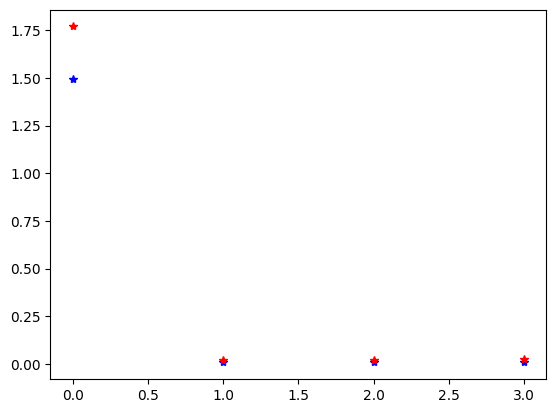

In [ ]:
plt.plot(E_TRAIN,'b*')
plt.plot(E_TEST, 'r*')
plt.show

79.73667045247032
1671.4184701107474
1.5907622931992647
1918.4294004627204
3.6630831496634193
1847.7793894392914
0.833366902347302
1868.6093834441479
2.6233253683824024e-25
1731.0397547937068


<function matplotlib.pyplot.show(close=None, block=None)>

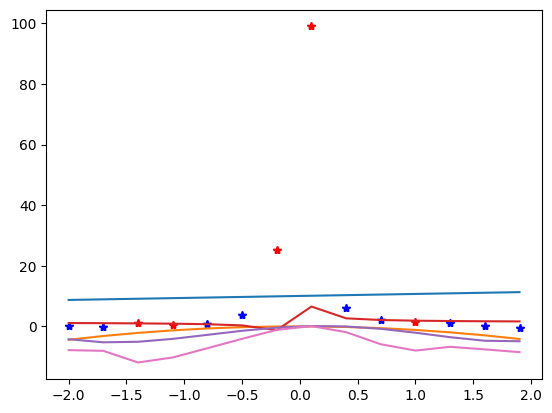

In [ ]:
file = np.loadtxt("/content/dane16.txt")
X = file[:,[0]]
y = file[:,[1]]

#print(X)
#print(y)

E_TEST = []
E_TRAIN = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.show

F1 = np.hstack([X, np.ones(X.shape)]) #macierz parametrów
V1 = np.linalg.inv(F1.T @ F1) @ F1.T @ y #macierz psełdo odwrotna mnozona przez y

#TRAIN
#liczenie bledu 
E1_train = y_train - (V1[0]*X_train + V1[1])
#sredni blad kwadratowy
#MSE1_train = (E1_train.T @ E1_train)/len(E1_train)
MSE1_train = np.mean(E1_train**2)
print(MSE1_train)

#TEST
#liczenie bledu 
E1_test = y_test - (V1[0]*X_test + V1[1])
#sredni blad kwadratowy
#MSE1_test = (E1_test.T @ E1_test)/len(E1_test)
MSE1_test = np.mean(E1_test**2)
print(MSE1_test)

E_TRAIN.append(MSE1_train)
E_TEST.append(MSE1_test)

F2 = np.hstack([X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V2 = np.linalg.pinv(F2) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E2_train = y_train - (V2[0]*np.square(X_train) + V2[1]*X_train + V2[2])
# sredni blad kwadratowy
MSE2_train = np.mean(E2_train**2)
print(MSE2_train)

# TEST
# liczenie bledu 
E2_test = y_test - (V2[0]*np.square(X_test) + V2[1]*X_test + V2[2])
# sredni blad kwadratowy
MSE2_test = np.mean(E2_test**2)
print(MSE2_test)

E_TRAIN.append(MSE2_train)
E_TEST.append(MSE2_test)

F3 = np.hstack([1/X_train, np.ones(X_train.shape)]) #macierz parametrów
V3 = np.linalg.pinv(F3) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E3_train = y_train - (V3[0]/X_train + V3[1])
# sredni blad kwadratowy
MSE3_train = np.mean(E3_train**2)
print(MSE3_train)

# TEST
# liczenie bledu 
E3_test = y_test - (V3[0]/X_test + V3[1])
# sredni blad kwadratowy
MSE3_test = np.mean(E3_test**2)
print(MSE3_test)

E_TRAIN.append(MSE3_train)
E_TEST.append(MSE3_test)

F5 = np.hstack([X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V5 = np.linalg.pinv(F5) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E5_train = y_train - (V5[0]*np.power(X_train, 5) + V5[1]*np.power(X_train, 4) + V5[2]*np.power(X_train, 3) +V5[3]*np.power(X_train, 2) + V5[4]*X_train + V5[5])
# sredni blad kwadratowy
MSE5_train = np.mean(E5_train**2)
print(MSE5_train)

# TEST
# liczenie bledu 
E5_test = y_test - (V5[0]*np.power(X_test, 5) + V5[1]*np.power(X_test, 4) + V5[2]*np.power(X_test, 3) +V5[3]*np.power(X_test, 2) + V5[4]*X_test + V5[5])
# sredni blad kwadratowy
MSE5_test = np.mean(E5_test**2)
print(MSE5_test)

E_TRAIN.append(MSE5_train)
E_TEST.append(MSE5_test)

F6 = np.hstack([X_train**9,X_train**8,X_train**7,X_train**6,X_train**5,X_train**4,X_train**3,X_train**2,X_train, np.ones(X_train.shape)]) #macierz parametrów
V6 = np.linalg.pinv(F6) @ y_train #macierz psełdo odwrotna mnozona przez y 

# TRAIN
# liczenie bledu 
E6_train = y_train - (V6[0]*np.power(X_train, 9) +V6[1]*np.power(X_train, 8) +V6[2]*np.power(X_train, 7) +V6[3]*np.power(X_train, 6) +V6[4]*np.power(X_train, 5) + V6[5]*np.power(X_train, 4) + V6[6]*np.power(X_train, 3) +V6[7]*np.power(X_train, 2) + V6[8]*X_train + V6[9])
# sredni blad kwadratowy
MSE6_train = np.mean(E6_train**2)
print(MSE6_train)

# TEST
# liczenie bledu 
E6_test = y_test - (V6[0]*np.power(X_test, 9) +V6[1]*np.power(X_test, 8) +V6[2]*np.power(X_test, 7) +V6[3]*np.power(X_test, 6) +V6[4]*np.power(X_test, 5) + V6[5]*np.power(X_test, 4) + V6[6]*np.power(X_test, 3) +V6[7]*np.power(X_test, 2) + V6[8]*X_test + V6[9])
# sredni blad kwadratowy
MSE6_test = np.mean(E6_test**2)
print(MSE6_test)

E_TRAIN.append(MSE6_train)
E_TEST.append(MSE6_test)


plt.plot(X_train, y_train, 'b*')
plt.plot(X_test, y_test, '*r')
plt.plot(X, V1[0]*X + V1[1]) #model 1
plt.plot(X, V2[0]*X*X + V2[1]*X, V2[2]) #model 2
plt.plot(X, V3[0]/X + V3[1]) #model 3
plt.plot(X, V5[0]*X**5 + V5[1]*X**4 + V5[2]*X**3 +V5[3]*X*X + V5[4]*X, V5[5]) #model 5
plt.plot(X, V6[0]*X**9 +V6[1]*X**8 +V6[2]*X**7 +V6[3]*X**6 +V6[4]*X**5 + V6[5]*X**4 + V6[6]*X**3 +V6[7]*X*X + V6[8]*X, V6[9]) #model 6
plt.show
